In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy
from scipy.stats import t
from scipy.stats import kstest
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
import pulp
import pandas as pd

# Create random variables in standard normal distribution with Box-Muller
# In scenario 2, for edge source_2 edge source_1, we create the data set

In [2]:
#edge source 1
case=1000
x1=[]
x2=[]
random.seed(42)
for i in np.arange(1,1001,1):
    U1 = np.random.rand(case) #generate in the uniform distribution [0,1)
    U2 = np.random.rand(case)
    z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    x1.append(z1)
    x2.append(z2)

In [3]:
#edge source_2
case2=1000
x3=[]
x4=[]
random.seed(42)
for j in np.arange(1,1001,1):
    U3 = np.random.rand(case) #generate in the uniform distribution [0,1)
    U4 = np.random.rand(case)
    z3 = np.sqrt(-2 * np.log(U3)) * np.cos(2 * np.pi * U4)
    z4 = np.sqrt(-2 * np.log(U3)) * np.sin(2 * np.pi * U4)
    x3.append(z3)
    x4.append(z4)

# Visualize the generated input data

1.0006130587698425
0.9991280026078022
-0.0007332918552979277
-0.0011426063786981852


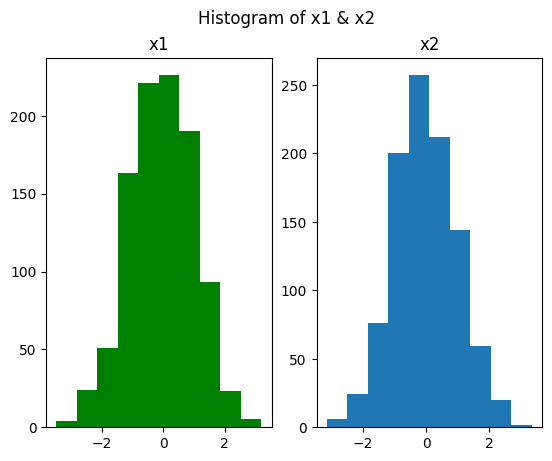

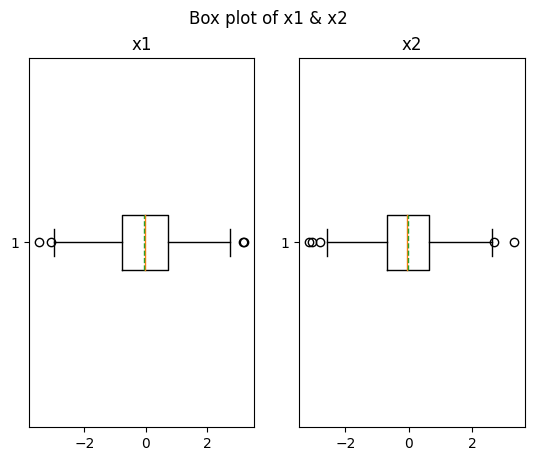

<Figure size 568x284 with 0 Axes>

In [4]:
#source_1
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram of x1 & x2')
ax1.set_title('x1')
ax2.set_title('x2')
ax1.hist(z1,color='green')
ax2.hist(z2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Box plot of x1 & x2')
ax1.set_title('x1')
ax2.set_title('x2')
ax1.boxplot(z1,showmeans=True, meanline=True,vert=0)
ax2.boxplot(z2, showmeans=True, meanline=True,vert=0)
f = plt.figure()# create figure
f.set_figwidth(4) # set width, height, dpi
f.set_figheight(2)
f.set_dpi(142)

1.0010271401658433
0.998922706655738
0.001137966169001392
0.00019035461726337336


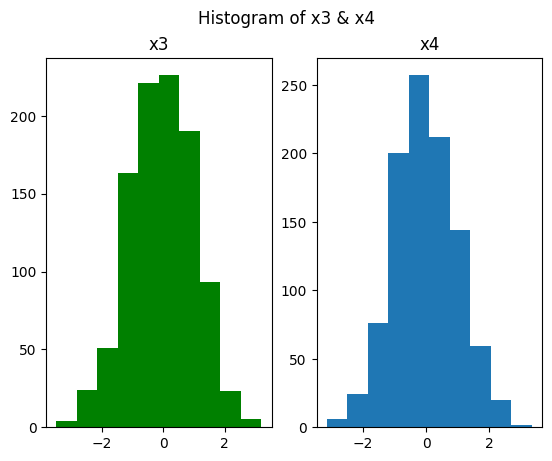

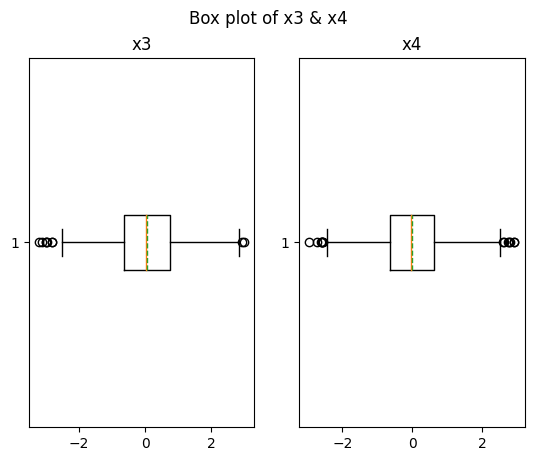

<Figure size 568x284 with 0 Axes>

In [5]:
#edge source_2
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.suptitle('Histogram of x3 & x4')
ax3.set_title('x3')
ax4.set_title('x4')
ax3.hist(z3,color='green')
ax4.hist(z4)

fig, (ax3, ax4) = plt.subplots(1, 2)
fig.suptitle('Box plot of x3 & x4')
ax3.set_title('x3')
ax4.set_title('x4')
ax3.boxplot(z3,showmeans=True, meanline=True,vert=0)
ax4.boxplot(z4, showmeans=True, meanline=True,vert=0)
f = plt.figure()# create figure
f.set_figwidth(4) # set width, height, dpi
f.set_figheight(2)
f.set_dpi(142)

# Transform value for std {0.1;0.5;1.0;1.5}
# Choose the edge source to 1 with capacity 20

In [6]:
#source_1
combine1=np.concatenate((x1,x2))
combine1df = pd.DataFrame({'random N(0,1) of edge:source_1':combine1)
print(combine1df['random N(0,1) of edge:source_1'].describe())

the std is 1.0235045000176297
the mean is -0.032690511565153554


In [7]:
# source_2
combine2=np.concatenate((x3,x4))
combine2df = pd.DataFrame({'random N(0,1) of edge:source_2':combine1)
print(combine2df['random N(0,1) of edge:source_2'].describe())

the std is 0.9948483601622604
the mean is 0.025086249659199294


#Export to excel
combine1df_path = 'random_edge_s1 N(0,1).xlsx'
combine1df.to_excel(combine1df_path, index=False)
combine2df_path = 'random_edge_s2 N(0,1).xlsx'
combine2df.to_excel(combine2df_path, index=False)

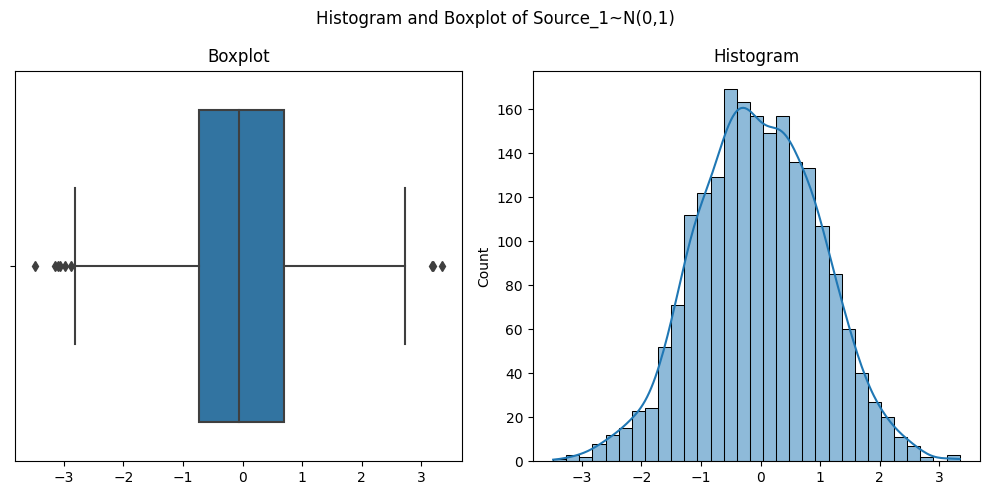

In [9]:
#source_1
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Histogram and Boxplot of Source_1~N(0,1)')
sns.boxplot(x=combine1, ax=ax_box)
ax_box.set_title('Boxplot')
sns.histplot(combine1, ax=ax_hist, kde=True)
ax_hist.set_title('Histogram')
plt.tight_layout()

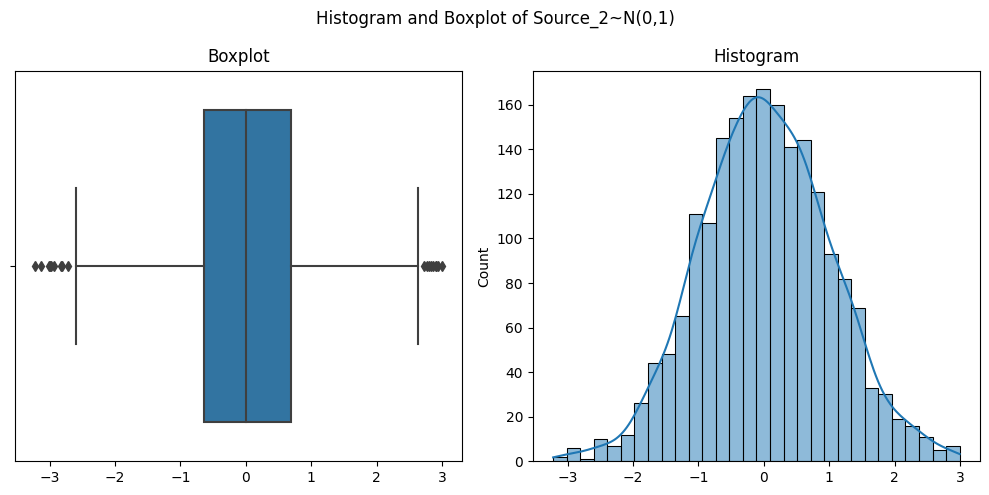

In [10]:
#edge source_2
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Histogram and Boxplot of Source_2~N(0,1)')
sns.boxplot(x=combine2, ax=ax_box)
ax_box.set_title('Boxplot')
sns.histplot(combine2, ax=ax_hist, kde=True)
ax_hist.set_title('Histogram')
plt.tight_layout()

In [11]:
mean1 = 20 #x_s1
mean2 =15#x_s2
std1=0.1 #std is choosen mannually, use both edges
value1_s1 = [i*std1 + mean1 for i in combine1]
value1_s2= [j*std1 + mean2 for j in combine2]

value1_s1df = pd.DataFrame({'s_1,std=0.1':value1_s1})
value1_s2df = pd.DataFrame({'s_2,std=0.1':value1_s2})
print(value1_s1df['s_1,std=0.1'].describe())
print(value1_s1df['s_2,std=0.1'].describe())

In [12]:
mean1 = 20 #x_s1
mean2 =15#x_s2
std5= 0.5 
value5_s1 = [i*std5 + mean1 for i in combine1]
value5_s2 = [j*std5 + mean2 for j in combine2]

value5_s1df = pd.DataFrame({'s_1,std=0.5':value5_s1})
value5_s2df = pd.DataFrame({'s_2,std=0.5':value5_s2})
print(value5_s1df['s_1,std=0.5'].describe())
print(value5_s2df['s_2,std=0.5'].describe())

In [13]:
mean1 = 20 #x_s1
mean2 =15#x_s2 
std10= 1.0 
value10_s1 = [i*std10 + mean1 for i in combine1]
value10_s2 = [j*std10 + mean2 for j in combine2]

value10_s1df = pd.DataFrame({'s_1,std=1.0':value10_s1})
value10_s2df = pd.DataFrame({'s_2,std=1.0':value10_s2})
print(value10_s1df['s_1,std=0.1'].describe())
print(value10_s1df['s_2,std=0.1'].describe())

In [14]:
mean1 = 20 #x_s1
mean2 =15#x_s2
std15= 1.5
value15_s1 = [i*std15 + mean1 for i in combine1]
value15_s2 = [j*std15 + mean2 for j in combine2]

value15_s1df = pd.DataFrame({'s_1,std=0.1':value15_s1})
value15_s2df = pd.DataFrame({'s_2,std=0.1':value15_s2})
print(value15_s1df['s_1,std=0.1'].describe())
print(value15_s1df['s_2,std=0.1'].describe())

# Present the new distribution after using location-scale family transform, example 0,5std

### source to 1

In [16]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value1_s1, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value1_s1, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std1} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(value5_s1, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value5_s1, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std5} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value10_s1, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value10_s1, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std10} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value15_s1, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(x=value15_s1, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std15} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### edge source to 2

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value1_s2, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value1_s2, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_2 with {std1} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value1_s2, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value1_s2, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_2 with {std5} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value10_s2, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value10_s2, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_2 with {std10} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value15_s2, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(x=value15_s2, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_5 with {std15} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#std 0.5
value5_np=np.array(value5)
#draw the input histogram and boxplot
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of Random Maxflow ~N({mean},{std5})")
sns.boxplot(x=value5_np,ax=ax_box, color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value5_np, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title('Histogram')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')
plt.show()

# Run linear programming with 1 input capacty with std {0.1;0.5;1.0;1.5}

In [17]:
#std=0.1
maxfl1=[]
for a,b in zip(value1_s1,value1_s2):
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp += x_s1 <= a #20
    lp += x_s2 <= b #15
    lp += x_s3 <= 17
    lp += x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl1.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl1[:50]}")

Solution status: Optimal
Max flow Random:[50.852041, 51.132337, 51.175387, 50.956942, 51.141985, 51.021298, 51.034441, 51.250237, 51.125819, 50.856703, 51.040816, 50.898205, 51.025126, 51.375805, 50.976555, 51.02096, 50.728636, 51.008366, 50.738743, 51.03507, 50.867588, 51.06425, 50.771289, 51.247402, 50.719808, 50.979662, 51.204845, 50.799479, 50.768849, 50.875308, 50.999029, 50.907065, 50.986365, 51.011455, 50.988935, 51.08798, 50.841485, 51.007488, 50.738527, 50.894406, 51.051593, 50.8879, 50.969289, 51.079619, 51.100592, 51.191809, 51.094564, 51.157901, 51.00055, 50.910244, 50.942225, 50.689757, 51.231619, 51.111442, 50.767819, 50.79158, 50.889226, 50.917813, 50.879092, 50.808171, 50.713895, 50.793093, 51.156405, 50.931092, 50.918893, 51.100006, 51.097368, 50.933054, 50.904829, 51.084105, 50.978367, 50.908478, 51.063802, 50.896927, 50.794277, 51.198405, 50.833547, 50.794498, 51.222267, 50.974895, 50.829888, 50.954833, 50.996074, 50.946229, 51.057889, 50.763655, 51.307109, 51.150645

In [18]:
#std=0.5
maxfl5=[]
for a,b in zip(value5_s1,value5_s2):
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp +=x_s1 <= a
    lp += x_s2 <= b
    lp +=x_s3 <= 17
    lp +=x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl5.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl5[:50]}")

Solution status: Optimal
Max flow Random:[50.260203, 51.661685, 51.876934, 50.784709, 51.709926, 51.106492, 51.172205, 52.251186, 51.629095, 50.283514, 51.204082, 50.491023, 51.125628, 52.580265, 50.882776, 51.104799, 49.643179, 51.04183, 49.693716, 51.175351, 50.337941, 51.321249, 49.856447, 52.237011, 49.599042, 50.898308, 52.024227, 49.997394, 49.844243, 50.376539, 50.995146, 50.535323, 50.931825, 51.057274, 50.944673, 51.439901, 50.207424, 51.037441, 49.692637, 50.472031, 51.257964, 50.439499, 50.846443, 51.398093, 51.502958, 51.959044, 51.472819, 51.789504, 51.002748, 50.55122, 50.711124, 49.448784, 52.158097, 51.557209, 49.839095, 49.9579, 50.446132, 50.589066, 50.395458, 50.040853, 49.569473, 49.965467, 51.710827, 50.655459, 50.594464, 51.500028, 51.48684, 50.665272, 50.524146, 51.420524, 50.891833, 50.542392, 51.319011, 50.484634, 49.971383, 51.992023, 50.167733, 49.972489, 52.111336, 50.874477, 50.149439, 50.774165, 50.980371, 50.731147, 51.289446, 49.818274, 52.535544, 51.753

In [19]:
maxfl10=[]
for a,b in zip(value10_s1,value10_s2):
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp +=x_s1 <= a
    lp += x_s2 <= b
    lp +=x_s3 <= 17
    lp +=x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl10.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl10[:50]}")

Solution status: Optimal
Max flow Random:[49.520407, 51.804986, 52.753869, 50.569418, 52.419852, 50.768441, 51.344409, 53.369448, 52.25819, 49.567029, 51.267617, 49.982046, 51.251257, 53.16053, 50.765553, 51.209598, 48.286357, 51.08366, 48.387433, 51.350702, 49.675881, 51.642499, 48.712893, 53.037837, 48.198084, 50.796615, 52.195538, 48.994789, 48.688485, 49.753078, 50.990293, 50.070647, 50.86365, 51.114548, 50.281784, 51.292503, 49.414847, 51.074882, 48.385274, 49.944063, 51.515929, 49.878997, 50.692885, 51.796186, 52.005916, 52.918088, 51.631494, 52.121706, 51.005497, 50.10244, 50.422249, 47.897568, 52.877557, 52.114417, 48.678189, 48.915799, 49.892264, 50.178133, 49.790917, 49.081707, 48.138945, 48.930935, 51.421654, 50.310917, 50.188929, 51.888531, 51.865901, 50.330543, 50.048292, 51.841047, 50.783667, 50.084784, 51.519695, 49.969267, 48.942767, 52.984047, 49.335467, 48.944977, 52.537118, 50.748954, 49.298878, 50.548331, 50.960741, 50.462295, 51.578892, 48.636547, 54.071088, 52.506

In [20]:
#std=1.5
maxfl15=[]
for a,b in zip(value15_s1,value15_s2):
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp +=x_s1 <= a
    lp += x_s2 <= b
    lp +=x_s3 <= 17
    lp +=x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl15.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl15[:50]}")

Solution status: Optimal
Max flow Random:[48.78061, 51.70748, 53.630803, 50.354126, 52.767556, 50.152662, 51.516614, 54.054172, 52.68177, 48.850543, 50.901426, 49.47307, 51.376885, 53.740795, 50.648329, 51.314397, 46.929536, 51.099779, 47.081149, 51.526053, 49.013822, 51.881614, 47.56934, 53.556755, 46.797126, 50.364193, 52.293308, 47.992183, 47.532728, 49.129617, 50.985439, 49.60597, 50.795475, 51.171822, 49.422676, 50.938754, 48.622271, 51.112323, 47.077911, 49.416094, 51.773893, 49.318496, 50.539328, 52.194279, 52.508874, 53.877132, 51.447241, 52.182558, 50.981324, 49.653661, 50.133373, 46.346352, 53.316336, 52.671626, 47.517284, 47.873699, 49.338396, 49.767199, 49.186375, 48.12256, 46.708418, 47.896402, 51.132481, 49.966376, 49.783393, 51.832797, 51.798852, 49.995815, 49.572438, 52.104906, 50.6755, 49.627176, 51.279543, 49.453901, 47.91415, 53.97607, 48.5032, 47.917466, 52.805678, 50.623432, 48.448317, 50.322496, 50.941112, 50.193442, 51.868338, 47.454821, 55.32743, 53.156513, 54.0

# transform value into data frame and show statistic summary

In [21]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
#std=0.1
df1 = pd.DataFrame({'maxflow':maxfl1})
print(type(df1))
print(df1.head())
print(df1.shape)
print("================")
#statistic summary
summary1= df1['maxflow'].describe()
print(summary1)

<class 'pandas.core.frame.DataFrame'>
     maxflow
0  50.852041
1  51.132337
2  51.175387
3  50.956942
4  51.141985
(2000, 1)
count    2000.000000
mean       50.999240
std         0.143474
min        50.599689
25%        50.905469
50%        50.996302
75%        51.094482
max        51.486835
Name: maxflow, dtype: float64


In [22]:
#std=0.5
df5 = pd.DataFrame({'maxflow':maxfl5})
print(df5.head())
#summary statisitcs
print("================")
summary5= df5['maxflow'].describe()
print(summary5)

     maxflow
0  50.260203
1  51.661685
2  51.876934
3  50.784709
4  51.709926
count    2000.000000
mean       50.992279
std         0.711367
min        48.998446
25%        50.527348
50%        50.981365
75%        51.471062
max        53.416033
Name: maxflow, dtype: float64


In [23]:
#std=1.0
df10 = pd.DataFrame({'maxflow':maxfl10})
print(df10.head())
#summary statisitcs
print("================")
summary10= df10['maxflow'].describe()
print(summary10)

     maxflow
0  49.520407
1  51.804986
2  52.753869
3  50.569418
4  52.419852
count    2000.000000
mean       50.910371
std         1.345780
min        46.996893
25%        50.042673
50%        50.937902
75%        51.829253
max        54.931782
Name: maxflow, dtype: float64


In [24]:
#std=1.5
df15 = pd.DataFrame({'maxflow':maxfl15})
print(df15.head())
#summary statisitcs
print("================")
summary15= df15['maxflow'].describe()
print(summary15)

     maxflow
0  48.780610
1  51.707480
2  53.630803
3  50.354126
4  52.767556
count    2000.000000
mean       50.761547
std         1.941591
min        44.995339
25%        49.478832
50%        50.835819
75%        52.086966
max        56.397672
Name: maxflow, dtype: float64


# Visualization with plot, histogram and boxplot

## a. Plot

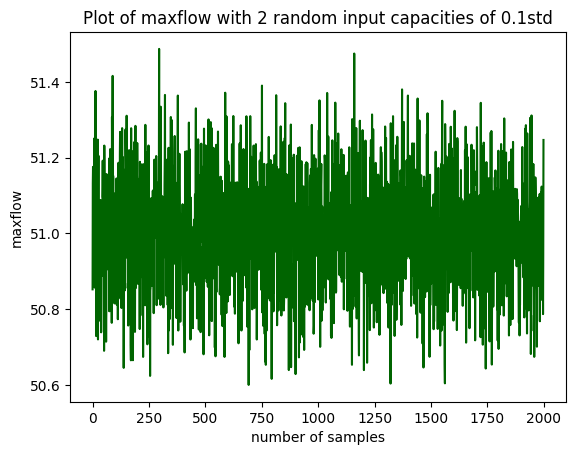

<Figure size 600x400 with 0 Axes>

In [25]:
#std=0.1
plt.plot(np.arange(len(maxfl1)),maxfl1, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 2 random input capacities of {std1}std')
plt.figure(figsize=(6, 4))

plt.savefig("value.png")

In [26]:
import os
print(os.getcwd())

C:\Users\DELL


<Figure size 600x400 with 0 Axes>

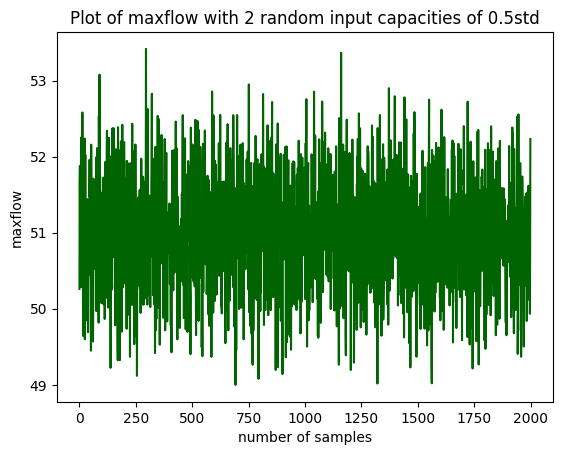

<Figure size 600x400 with 0 Axes>

In [27]:
#std=0.5
#https://matplotlib.org/stable/gallery/color/named_colors.html
plt.plot(np.arange(len(maxfl5)),maxfl5, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 2 random input capacities of {std5}std')
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

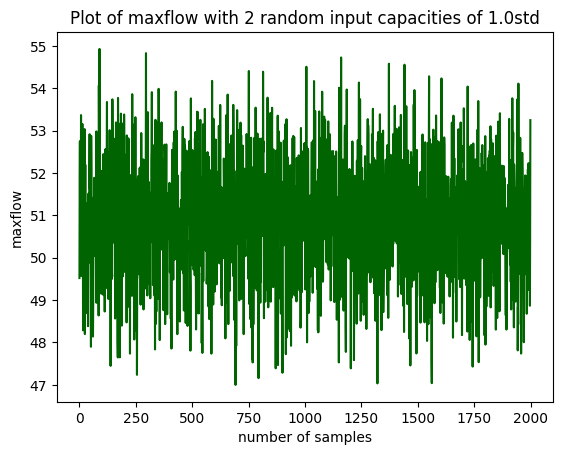

<Figure size 600x400 with 0 Axes>

In [28]:
#std=1.0
#https://matplotlib.org/stable/gallery/color/named_colors.html
plt.plot(np.arange(len(maxfl10)),maxfl10, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 2 random input capacities of {std10}std')
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

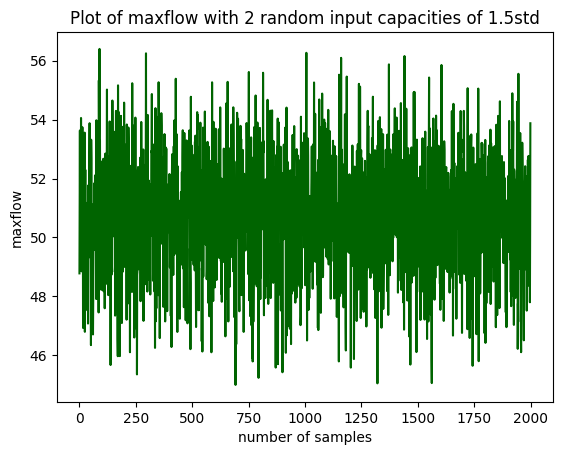

<Figure size 600x400 with 0 Axes>

In [29]:
#std=1.5
plt.plot(np.arange(len(maxfl15)),maxfl15, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 2 random input capacities of {std15}std')
plt.figure(figsize=(6, 4))

## b. histogram

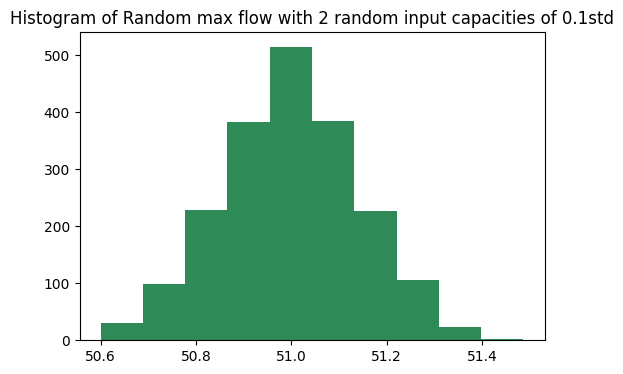

In [30]:
#std=0.1
plt.figure(figsize=(6, 4))
plt.title(f"Histogram of Random max flow with 2 random input capacities of {std1}std")
plt.hist(maxfl1,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.show()

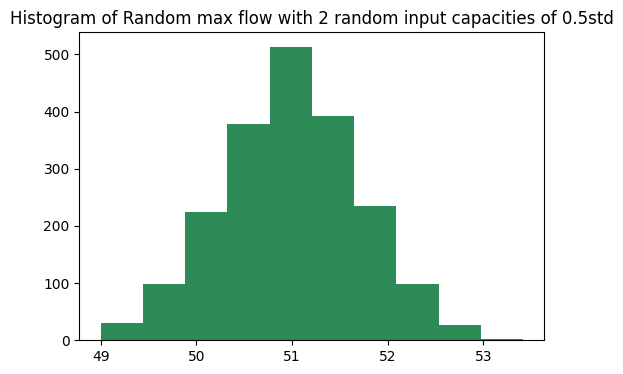

In [31]:
#std=0.5
plt.figure(figsize=(6, 4))
plt.hist(maxfl5,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.title(f"Histogram of Random max flow with 2 random input capacities of {std5}std")
plt.show()

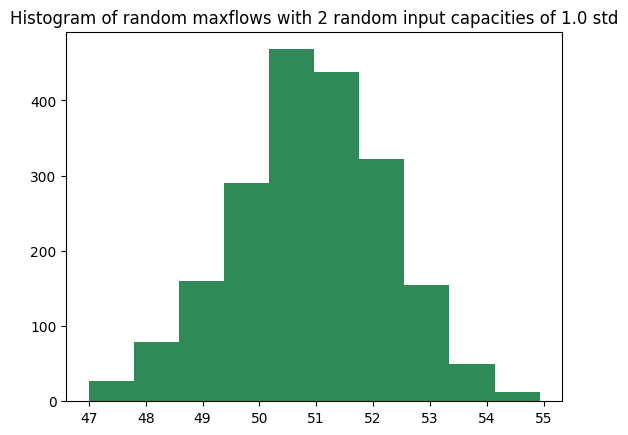

In [32]:
#std=1.0
plt.hist(maxfl10,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.title(f"Histogram of random maxflows with 2 random input capacities of {std10} std")
plt.show()

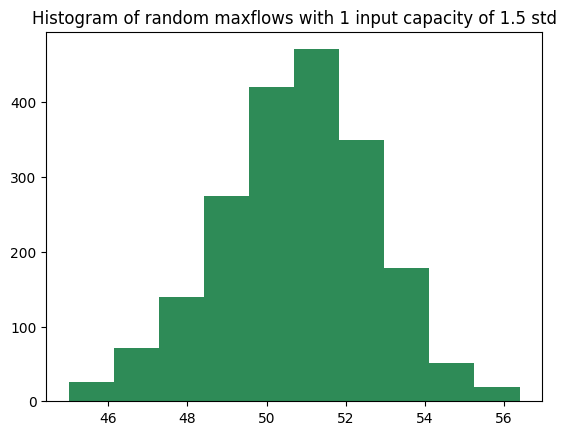

In [33]:
#std 1.5
plt.hist(maxfl15,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.title(f"Histogram of random maxflows with 1 input capacity of {std15} std")
plt.show()

## c. boxplot

[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 0.1std')]

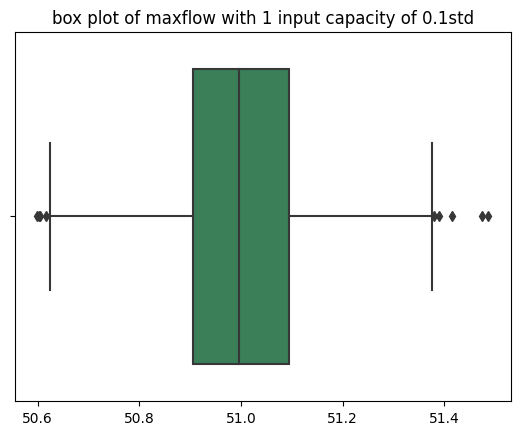

In [34]:
#std=0.1
sns.boxplot(x=maxfl1,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std1}std')

[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 0.5std')]

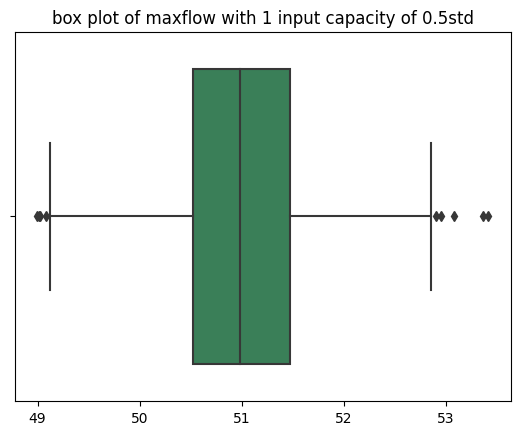

In [35]:
#std=0.5
sns.boxplot(x=maxfl5,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std5}std')


[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 1.0std')]

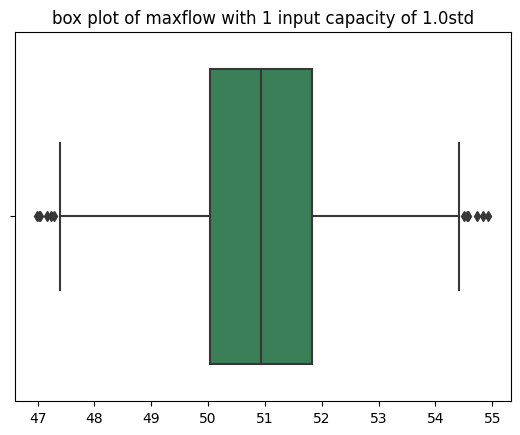

In [36]:
#std=1.5
sns.boxplot(x=maxfl10,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std10}std')

[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 1.5std')]

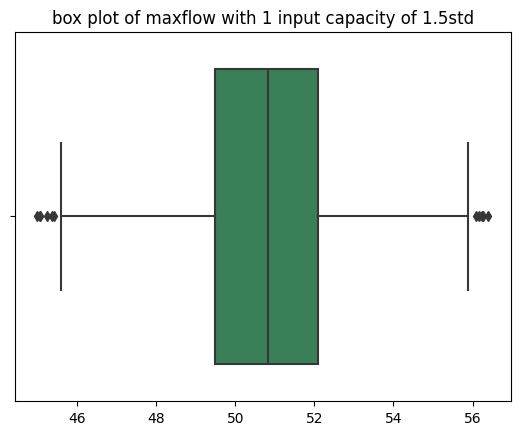

In [37]:
#std=1.5
sns.boxplot(x=maxfl15,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std15}std')

# Non-Graphical test: 1 sample Kolmogorov-Smirnov test (book p269&351)
https://intapi.sciendo.com/pdf/10.2478/rrlm-2022-0030
##### suitable for large sample size (n>=50) and no distribution assumption  required for test data. We compare the CDF of the test data with the CDF of the normal distribution.
- H0: Fs(x) is equal to Ft(x) for all x from -inf. to inf
- HA: Fs(x) is not equal to Ft(x) for at least one x
##### => We choose the confidence interval =95% ->significance level =5% If p-value of KS test <0.05 , reject H0 and accept HA.

In [40]:
ks= kstest(maxfl1, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution


In [42]:
ks= kstest(maxfl5, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution


In [43]:
ks= kstest(maxfl10, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution


In [44]:
ks= kstest(maxfl15, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution
